In [12]:
# library import and constant definition
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import re
import requests

import numpy as np
from skimage import data
from skimage.color import rgb2gray

import pytesseract
import os, os.path

import random
from pathlib import Path


cwd = os.getcwd()
print("Current working Directory:", cwd)

Current working Directory: D:\GitRepositories\CardSorterFantasia\MagicDatabaseDownloader


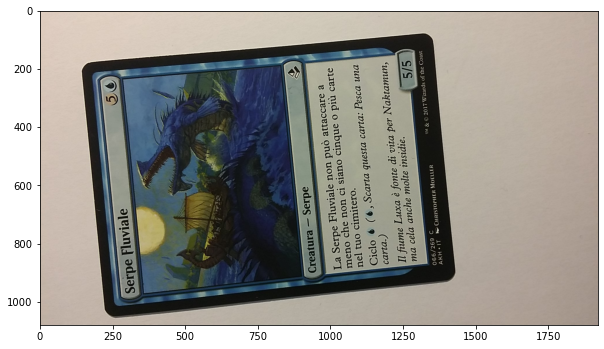

In [17]:
r = requests.get("http://192.168.1.113:8080/photoaf.jpg", allow_redirects=True)
open("photo.jpg", 'wb').write(r.content)
img = mpimg.imread("photo.jpg").astype(np.uint8)

fig, ax = plt.subplots(1, 1, figsize=(10, 6) )
ax.imshow(img);

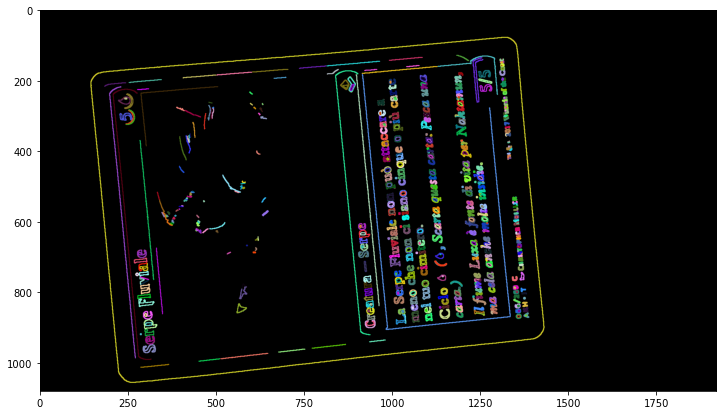

In [19]:
import cv2 as cv
import random as rng

src_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Detect edges using Canny
threshold = 250

canny_output = cv.Canny(src_gray, threshold, threshold * 2)

# Find contours
contours, hierarchy = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw contours
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)

# Show in a window
#cv.imshow('Contours', drawing)

fig, ax = plt.subplots(1, 1, figsize=(15, 7) )
ax.imshow(drawing);